### 상관분석
- 피어슨 상관계수 : 모두 연속형, 1에 가까울수록 양의 상관관계가 강함, 0이면 약함
- 스피어만 상관계수 : 순위 사이의 단조 관련성
- scipy.stats.pearsonr
- scipy.stats.spearmanr
- DataFrame.corr(method) : 상관행렬, method - pearson, spearman

In [56]:
import pandas as pd
df = pd.read_excel("일별_금은달러.xlsx")

In [62]:
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [79]:
df.sort_values(by = '일자', inplace = True)

In [85]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

([<matplotlib.axis.XTick at 0x27cccd44c88>,
 <a list of 4 Text xticklabel objects>)

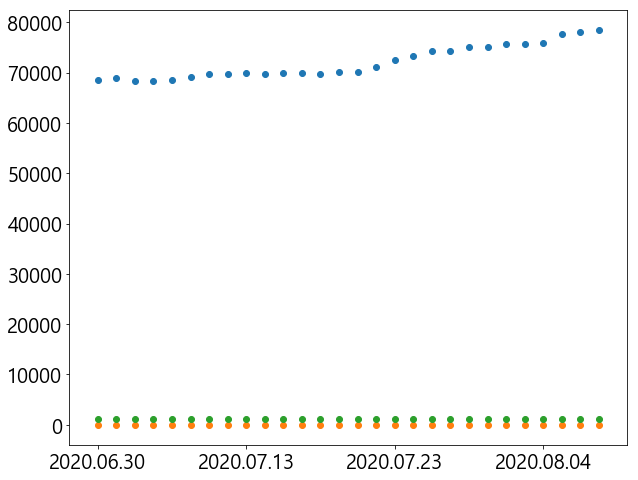

In [86]:
plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])

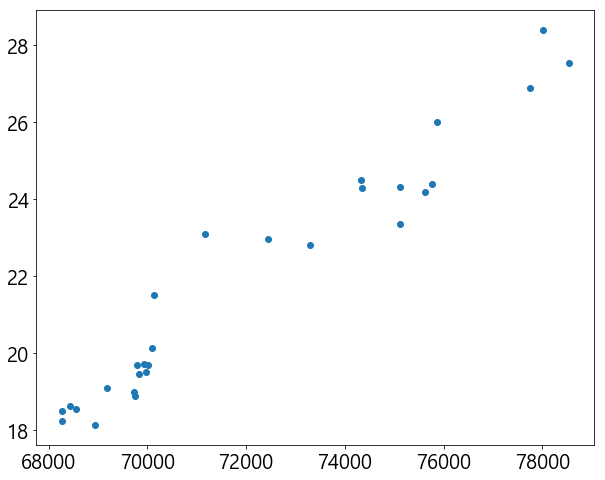

In [88]:
plt.scatter(df['금값'], df['은값'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027CCCD706D8>,
      dtype=object)

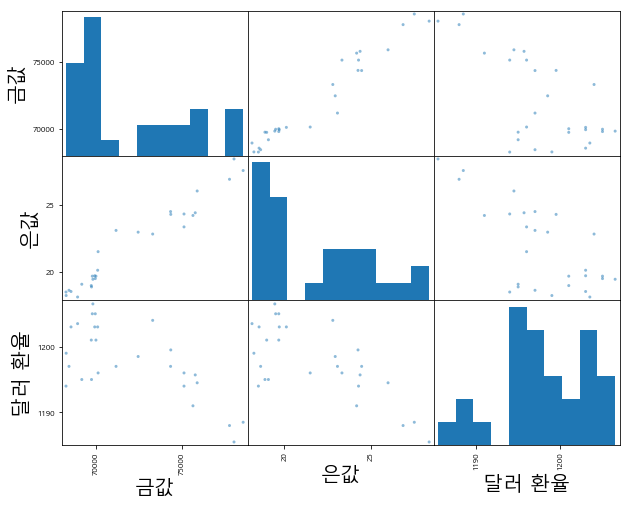

In [87]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [63]:
from scipy.stats import *
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033495, 7.5088783565577e-18)
(-0.6793266264341937, 7.033325258452259e-05)
(-0.6954569556203559, 3.989042061957972e-05)


In [67]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033495, p-value: 7.5088783565577e-18
금값 ~ 달러 환율: coef:-0.6793266264341937, p-value: 7.033325258452259e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


In [89]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109452
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [92]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [91]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
